Chapter 03

# 向量范数等高线
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)


该代码绘制了不同 $L_p$ 范数的等高线图，使用 $p$ 的不同值展示 $L_p$ 范数的变化，包括 $L_{\infty}$ 范数（$p = \infty$）。$L_p$ 范数的定义为：

$$
\| x \|_p = \left( |x_1|^p + |x_2|^p \right)^{\frac{1}{p}}
$$

当 $p = \infty$ 时，$L_{\infty}$ 范数定义为：

$$
\| x \|_{\infty} = \max(|x_1|, |x_2|)
$$

代码通过 `contourf` 绘制 $L_p$ 范数的等高线图，并在每个子图中使用黑色等高线标记 $L_p = 1$ 的轮廓。结果展示了 $p$ 不同取值下 $L_p$ 范数的几何形状，包括常见的曼哈顿距离（$p=1$）、欧几里得距离（$p=2$）、极值距离（$p=\infty$）等。
注意，只有  $p >= 1$ 时，$L_p$ 才是范数。

## 导入所需库

In [1]:
import matplotlib.pyplot as plt  # 导入Matplotlib库，用于绘图
import numpy as np  # 导入NumPy库，用于数值计算

## 定义p值列表

In [2]:
p_values = [0.05, 0.2, 0.5, 1, 1.5, 2, 4, 8, np.inf]  # 定义不同的p值

## 设置x1和x2的范围

In [3]:
x1 = np.linspace(-2.5, 2.5, num=101)  # 定义x1的范围
x2 = x1  # 设置x2的范围与x1相同

## 创建网格

In [4]:
xx1, xx2 = np.meshgrid(x1, x2)  # 生成x1和x2的网格

## 创建绘图画布

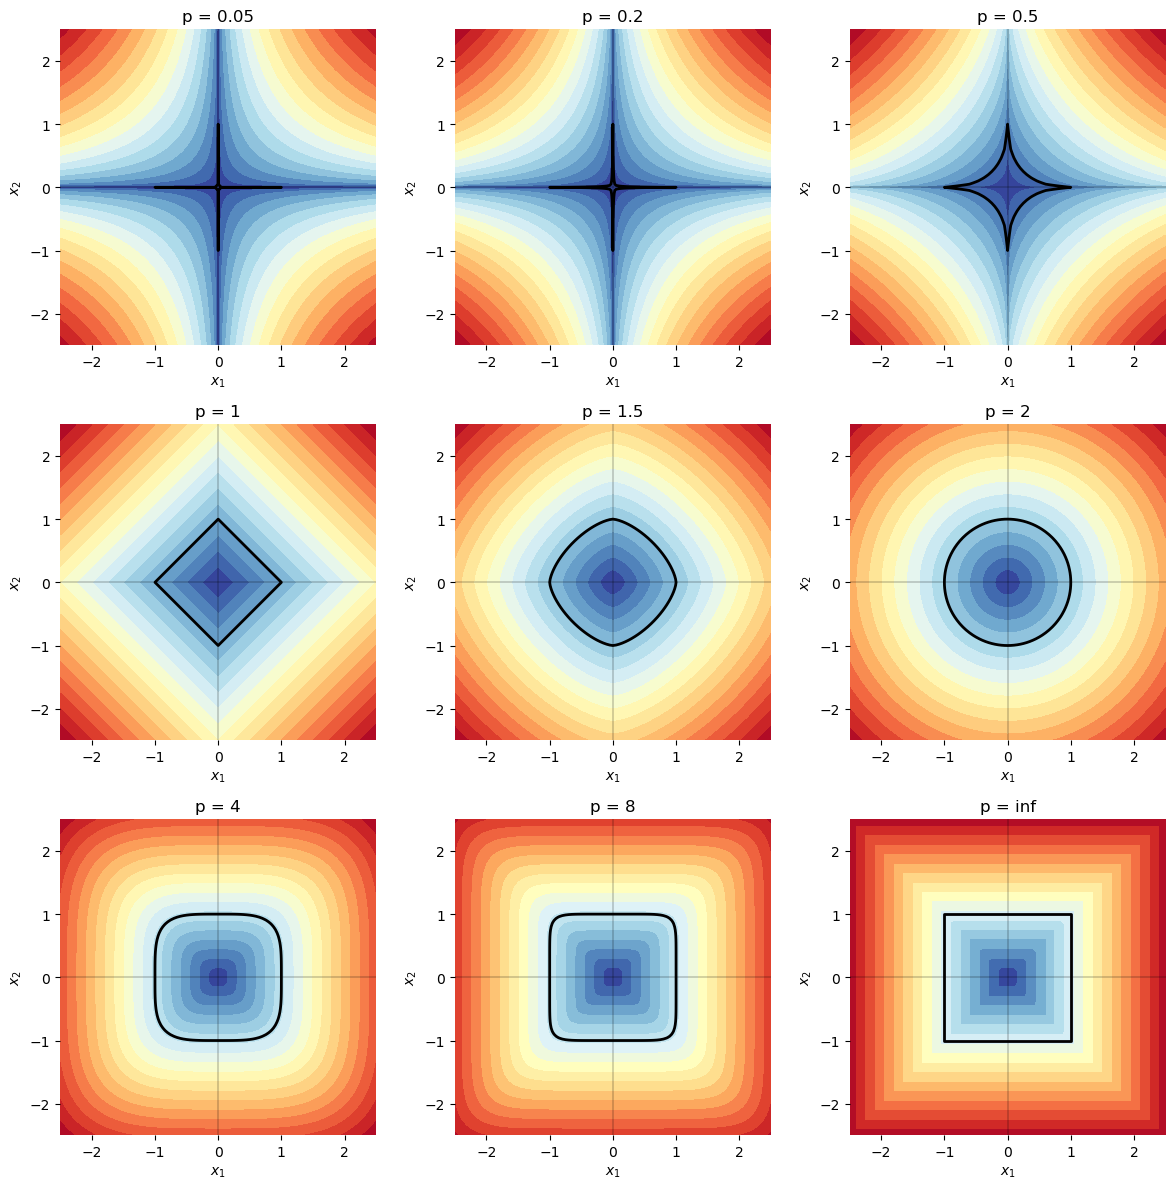

In [5]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 12))  # 创建3x3子图

## 遍历p值并绘制Lp范数的等高线图
for p, ax in zip(p_values, axes.flat):  # 遍历每个p值和子图轴
    
    if np.isinf(p):  # 检查p是否为无穷大
        zz = np.maximum(np.abs(xx1), np.abs(xx2))  # L∞范数计算
    else:
        zz = ((np.abs((xx1))**p) + (np.abs((xx2))**p))**(1./p)  # Lp范数计算
    
    ## 绘制Lp的等高线图
    ax.contourf(xx1, xx2, zz, 20, cmap='RdYlBu_r')  # 使用填充的等高线图展示Lp范数
    
    ## 绘制Lp=1的等高线
    ax.contour(xx1, xx2, zz, [1], colors='k', linewidths=2)  # 绘制Lp=1的等高线，颜色为黑色
    
    ## 图形装饰
    ax.axhline(y=0, color='k', linewidth=0.25)  # 绘制y=0的水平线
    ax.axvline(x=0, color='k', linewidth=0.25)  # 绘制x=0的垂直线
    ax.set_xlim(-2.5, 2.5)  # 设置x轴范围
    ax.set_ylim(-2.5, 2.5)  # 设置y轴范围
    ax.spines['top'].set_visible(False)  # 隐藏顶部边框
    ax.spines['right'].set_visible(False)  # 隐藏右侧边框
    ax.spines['bottom'].set_visible(False)  # 隐藏底部边框
    ax.spines['left'].set_visible(False)  # 隐藏左侧边框
    ax.set_xlabel('$x_1$')  # 设置x轴标签
    ax.set_ylabel('$x_2$')  # 设置y轴标签
    ax.set_title('p = ' + str(p))  # 设置子图标题，显示当前的p值
    ax.set_aspect('equal', adjustable='box')  # 设置坐标轴比例为相等

plt.tight_layout()
plt.show()  # 显示图形